# Deep Learning

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\TinkerBell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [5]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [6]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [7]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 27ms/step - loss: 35.1348 - mse: 35.1348 - val_loss: 34.9277 - val_mse: 34.9277
Epoch 2/200
35/35 [==============================] - 0s 6ms/step - loss: 31.6482 - mse: 31.6482 - val_loss: 32.2019 - val_mse: 32.2019
Epoch 3/200
35/35 [==============================] - 0s 6ms/step - loss: 28.4662 - mse: 28.4662 - val_loss: 29.7150 - val_mse: 29.7150
Epoch 4/200
35/35 [==============================] - 0s 8ms/step - loss: 25.5710 - mse: 25.5710 - val_loss: 27.3297 - val_mse: 27.3297
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 22.8333 - mse: 22.8333 - val_loss: 24.9276 - val_mse: 24.9276
Epoch 6/200
35/35 [==============================] - 0s 9ms/step - loss: 20.2349 - mse: 20.2349 - val_loss: 22.4068 - val_mse: 22.4068
Epoch 7/200
35/35 [==============================] - 0s 7ms/step - loss: 17.7253 - mse: 17.7253 - val_loss: 19.7625 - val_mse: 19.7625
Epoch 8/200
35/35 [==============================] - 0

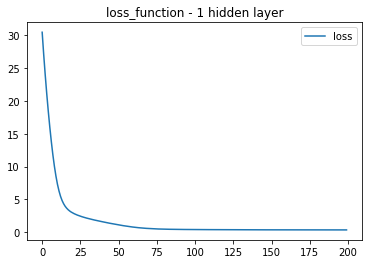

In [7]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [8]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [8]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 19ms/step - loss: 0.3913 - mse: 0.3913 - val_loss: 0.4489 - val_mse: 0.4489
Epoch 2/200
35/35 [==============================] - 0s 7ms/step - loss: 0.3890 - mse: 0.3890 - val_loss: 0.4532 - val_mse: 0.4532
Epoch 3/200
35/35 [==============================] - 0s 6ms/step - loss: 0.3925 - mse: 0.3925 - val_loss: 0.4483 - val_mse: 0.4483
Epoch 4/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3882 - mse: 0.3882 - val_loss: 0.4454 - val_mse: 0.4454
Epoch 5/200
35/35 [==============================] - 0s 7ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.4463 - val_mse: 0.4463
Epoch 6/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3867 - mse: 0.3867 - val_loss: 0.4424 - val_mse: 0.4424
Epoch 7/200
35/35 [==============================] - 0s 7ms/step - loss: 0.3890 - mse: 0.3890 - val_loss: 0.4449 - val_mse: 0.4449
Epoch 8/200
35/35 [==============================] - 0s 9ms/step - loss: 0.3870 - 

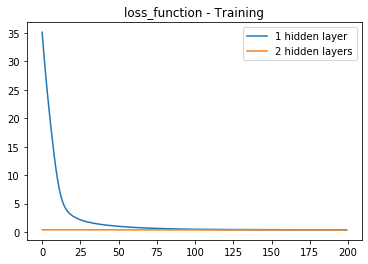

In [9]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

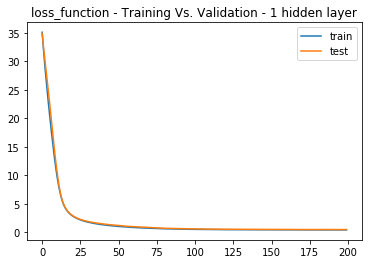

In [10]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

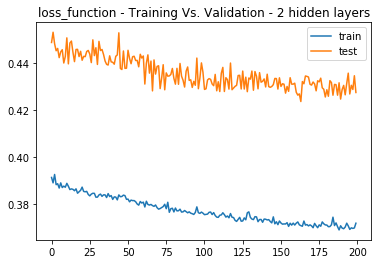

In [11]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()